# MathorCup 2024 论文支撑材料
## YinMo19

In [346]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime

from scipy.integrate import odeint
from scipy import linalg as la
from scipy import optimize
import scipy
import csv
import pandas as pd

config = {
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{CJK}",  # 预先导入CJK宏包处理中文
}
plt.rcParams.update(config)

## 读入数据

In [347]:
data = []
with open("../../附件/附件1.csv", "r", encoding="gb2312") as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        data.append(row)

head = data[0]
head_en = ["SC_ID", "date", "value"]

In [348]:
ALL_SC = list(set(list(np.array(data)[1:,0])))
data = np.array(data)

各种数据的声明：
- `data`：所有数据，以二重列表的形式，将每一行作为一个列表。
- `head`：表头
- `ALL_SC`：无序的所有`SC__`的合集
- `datas`: 货物量，以`SC__`为分类方法

将数据分开

In [349]:
datas = np.array(
    [[data__[2] for data__ in data[1:] if data__[0] == SC_] for SC_ in ALL_SC],
    dtype="int64",
)

写入csv文件，分开储存

In [350]:
for SC_ in ALL_SC:
    with open(f"../SC_datas/{SC_}.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(head_en)
        
        for row in data:
            if row[0] == SC_:
                writer.writerow(row)

## 绘制折线图

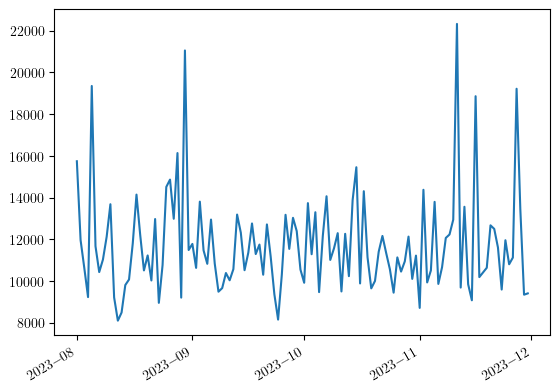

In [351]:
SC_48_data = [data[i][1] for i, _ in enumerate(data) if data[i][0] == "SC3"]
SC_48_value = np.array([data[i][2] for i, _ in enumerate(data) if data[i][0] == "SC3"],dtype="int64")
# 将日期字符串转换为datetime对象
dates = [datetime.datetime.strptime(date, "%Y/%m/%d") for date in SC_48_data]

# 对日期数据进行排序
dates.sort()

# 创建图表
plt.figure()
plt.plot(dates, SC_48_value)

# 设置横坐标为时间类型
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(r"%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图表
plt.show()

In [352]:
pre_data = []
with open("../SC_datas/predicted_volumes.csv", "r", encoding="gb2312") as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        pre_data.append(row)

In [353]:
pre_SC_48_data = [pre_data[i][0] for i, _ in enumerate(pre_data) if pre_data[i][1] == "3"]
pre_SC_48_value = np.array([pre_data[i][6] for i, _ in enumerate(pre_data) if pre_data[i][1] == "3"],dtype=float)
# 将日期字符串转换为datetime对象
pre_dates = [datetime.datetime.strptime(date, "%Y/%m/%d") for date in pre_SC_48_data]

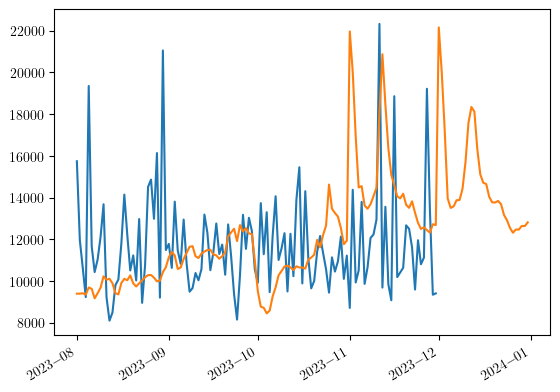

In [354]:
# 对日期数据进行排序
dates.sort()

# 创建图表
plt.figure()
plt.plot(dates, SC_48_value)
plt.plot(pre_dates, pre_SC_48_value)

# 设置横坐标为时间类型
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(r"%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图表
plt.show()

## 箱线图绘制

In [355]:
# 创建图表
fig, ax = plt.subplots(2, 3,figsize=(18, 10))
ax[0][0].boxplot(list(datas[0:9]), patch_artist=True, sym="+", labels=ALL_SC[0:9])
ax[0][1].boxplot(list(datas[10:19]), patch_artist=True, sym="+", labels=ALL_SC[10:19])
ax[1][0].boxplot(list(datas[20:29]), patch_artist=True, sym="+", labels=ALL_SC[20:29])
ax[1][1].boxplot(list(datas[30:39]), patch_artist=True, sym="+", labels=ALL_SC[30:39])
ax[0][2].boxplot(list(datas[40:49]), patch_artist=True, sym="+", labels=ALL_SC[40:49])
ax[1][2].boxplot(list(datas[50:56]), patch_artist=True, sym="+", labels=ALL_SC[50:56])

# 显示图表
with PdfPages("images/xxt_1.pdf") as pdf:
    pdf.savefig()
    plt.close()

清洗数据之后的箱线图

In [356]:
# 创建图表
fig, ax = plt.subplots(2, 3,figsize=(18, 10))
ax[0][0].boxplot(list(datas[0:9]), patch_artist=True, sym="", labels=ALL_SC[0:9])
ax[0][1].boxplot(list(datas[10:19]), patch_artist=True, sym="", labels=ALL_SC[10:19])
ax[1][0].boxplot(list(datas[20:29]), patch_artist=True, sym="", labels=ALL_SC[20:29])
ax[1][1].boxplot(list(datas[30:39]), patch_artist=True, sym="", labels=ALL_SC[30:39])
ax[0][2].boxplot(list(datas[40:49]), patch_artist=True, sym="", labels=ALL_SC[40:49])
ax[1][2].boxplot(list(datas[50:56]), patch_artist=True, sym="", labels=ALL_SC[50:56])

# 显示图表
with PdfPages("images/xxt_2.pdf") as pdf:
    pdf.savefig()
    plt.close()

清洗数据之后的csv

In [357]:
for SC_ in ALL_SC:
    # 读取CSV数据
    data = pd.read_csv(
        f"../SC_datas/{SC_}.csv", header=None, names=head_en
    )

    data["value"] = pd.to_numeric(data["value"], errors="coerce")
    data = data.dropna(subset=["value"])

    # 根据异常值标准删除行
    q1 = data["value"].quantile(0.25)
    q3 = data["value"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data = data[(data["value"] >= lower_bound) & (data["value"] <= upper_bound)]

    # 将处理后的数据写入新的CSV文件
    data.to_csv(f"../processed_SC/processed_{SC_}.csv", index=False)

In [358]:
print(ALL_SC)

['SC58', 'SC4', 'SC52', 'SC10', 'SC28', 'SC3', 'SC18', 'SC35', 'SC25', 'SC9', 'SC43', 'SC19', 'SC47', 'SC1', 'SC14', 'SC5', 'SC44', 'SC61', 'SC63', 'SC46', 'SC2', 'SC20', 'SC55', 'SC60', 'SC24', 'SC68', 'SC66', 'SC34', 'SC37', 'SC6', 'SC26', 'SC36', 'SC21', 'SC57', 'SC27', 'SC41', 'SC39', 'SC15', 'SC32', 'SC23', 'SC17', 'SC56', 'SC12', 'SC30', 'SC7', 'SC8', 'SC29', 'SC48', 'SC40', 'SC22', 'SC54', 'SC16', 'SC51', 'SC49', 'SC31', 'SC38', 'SC53']


In [359]:
# 假设您的时间数据是一个名为dates的数组
dates = [data[i][1] for i, _ in enumerate(data) if data[i][1] == "SC_48"]

# 将日期字符串转换为datetime对象
dates = [datetime.datetime.strptime(date, "%Y/%m/%d") for date in dates]

# 对日期数据进行排序
dates.sort()

# 模拟数据
y = range(len(dates))

# 创建图表
plt.figure()
plt.plot(dates, y)

# 设置横坐标为时间类型
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# 自动调整日期标签以避免重叠
plt.gcf().autofmt_xdate()

# 显示图表
plt.show()

KeyError: 0